In [12]:
from astropy.io import fits
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import resample

from rascal.calibrator import Calibrator
from rascal.util import refine_peaks

%matplotlib inline

In [13]:
data = fits.open('data_lt_sprat/v_a_20190516_57_1_0_1.fits')[0].data

<ipython-input-14-a0c827e8d172>:2: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(data.data), aspect='auto', origin='lower')


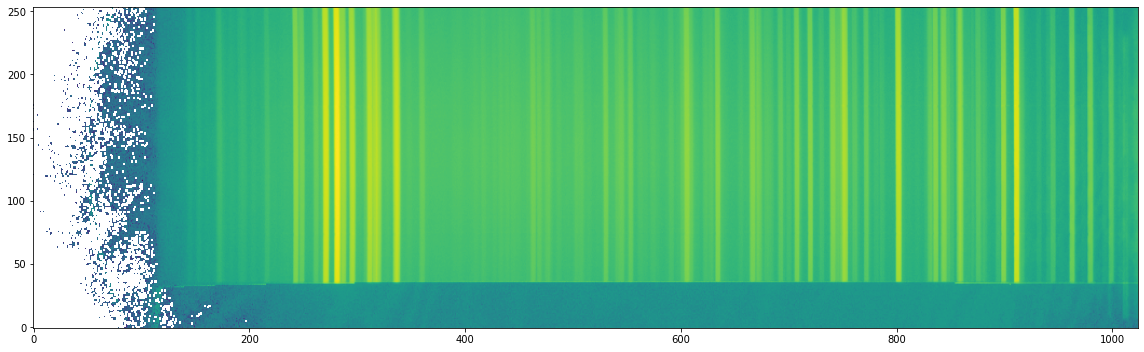

In [14]:
plt.figure(1, figsize=(16,5))
plt.imshow(np.log(data.data), aspect='auto', origin='lower')
plt.tight_layout()

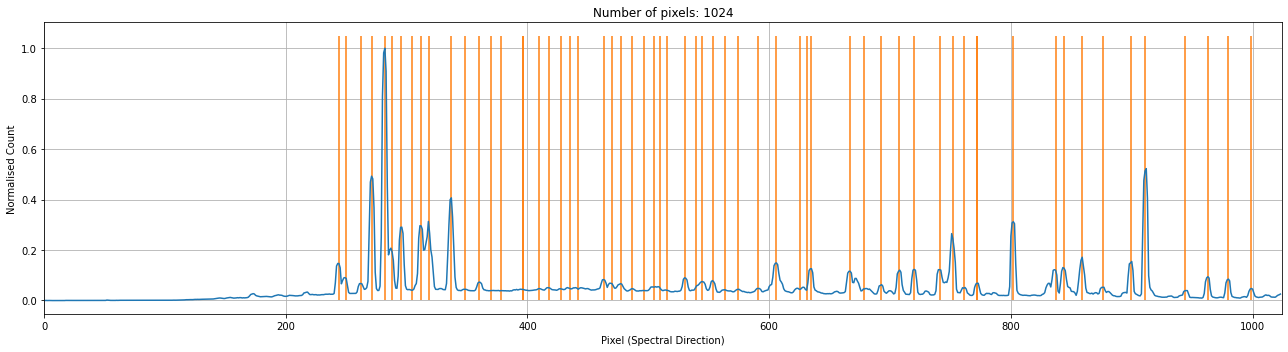

In [15]:
spectrum = np.median(data[110:120], axis=0)

peaks, _ = find_peaks(spectrum, height=500, distance=5, threshold=None)
peaks = refine_peaks(spectrum, peaks, window_width=5)

plt.figure(figsize=(18,5))
plt.plot(spectrum / spectrum.max())
plt.vlines(peaks, 0, 1.05, colors='C1')
plt.title('Number of pixels: ' + str(spectrum.shape[0]))
plt.xlabel("Pixel (Spectral Direction)")
plt.ylabel("Normalised Count")
plt.xlim(0, spectrum.shape[0])
plt.grid()
plt.tight_layout()

In [16]:
atlas = [
    4193.5, 4385.77, 4500.98, 4524.68, 4582.75, 4624.28, 4671.23, 4697.02,
    4734.15, 4807.02, 4921.48, 5028.28, 5618.88, 5823.89, 5893.29, 5934.17,
    6182.42, 6318.06, 6472.841, 6595.56, 6668.92, 6728.01, 6827.32, 6976.18,
    7119.60, 7257.9, 7393.8, 7584.68, 7642.02, 7740.31, 7802.65, 7887.40,
    7967.34, 8057.258
]
element = ['Xe'] * len(atlas)

In [17]:
c = Calibrator(peaks,
               num_pix=len(spectrum),
               min_wavelength=3500.,
               max_wavelength=8000.)
c.set_fit_constraints(num_slopes=5000,
                      range_tolerance=500.,
                      xbins=100,
                      ybins=100)
c.load_user_atlas(elements=element, wavelengths=atlas, constrain_poly=True)

INFO:rascal.calibrator:Peak at: 4499.292628007901 A
INFO:rascal.calibrator:- matched to 4500.98 A
INFO:rascal.calibrator:Peak at: 4526.551550370374 A
INFO:rascal.calibrator:- matched to 4524.68 A
INFO:rascal.calibrator:Peak at: 4582.396679309704 A
INFO:rascal.calibrator:- matched to 4582.75 A
INFO:rascal.calibrator:Peak at: 4622.357489020751 A
INFO:rascal.calibrator:- matched to 4624.28 A
INFO:rascal.calibrator:Peak at: 4670.35657790673 A
INFO:rascal.calibrator:- matched to 4671.23 A
INFO:rascal.calibrator:Peak at: 4699.194773797789 A
INFO:rascal.calibrator:- matched to 4697.02 A
INFO:rascal.calibrator:Peak at: 4733.784234050983 A
INFO:rascal.calibrator:- matched to 4734.15 A
INFO:rascal.calibrator:Peak at: 4771.912074086595 A
INFO:rascal.calibrator:Peak at: 4808.809641076626 A
INFO:rascal.calibrator:- matched to 4807.02 A
INFO:rascal.calibrator:Peak at: 4837.620168112648 A
INFO:rascal.calibrator:Peak at: 4921.093495297009 A
INFO:rascal.calibrator:- matched to 4921.48 A
INFO:rascal.cal

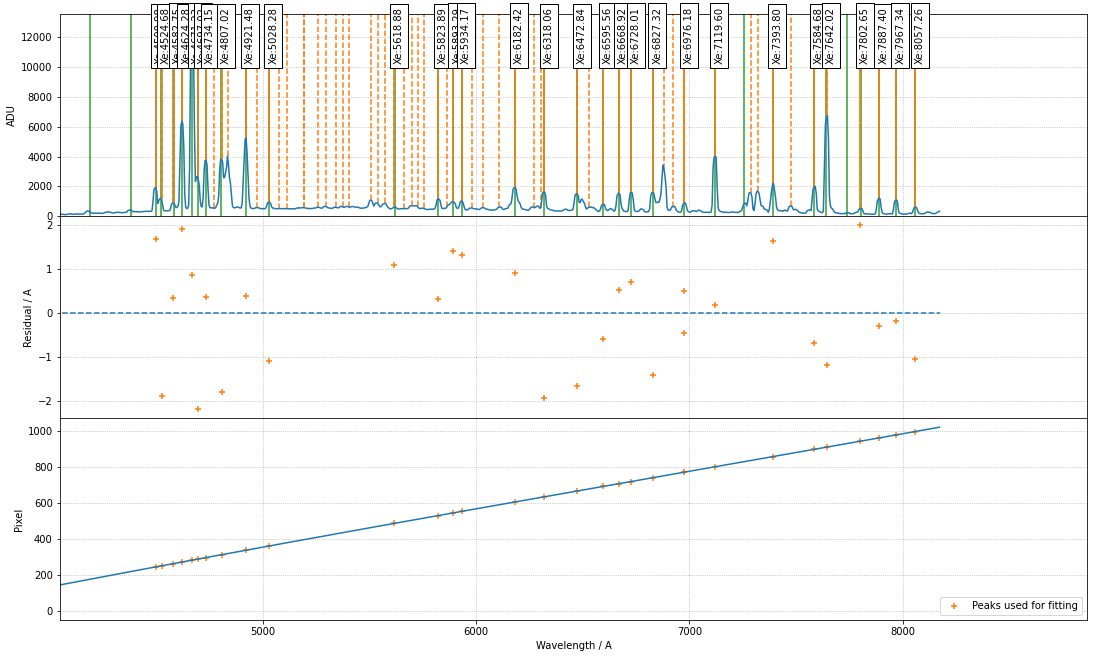

Stdev error: 0.6339240393843224 A
Peaks utilisation rate: 370.5882352941177%


In [18]:
polyfit_coeff, rms, residual, peak_utilisation = c.fit(sample_size=5,
                                                       top_n=5,
                                                       max_tries=500,
                                                       candidate_weighted=True,
                                                       hough_weight=1.0,
                                                       filter_close=True)

c.plot_fit(spectrum,
           polyfit_coeff,
           plot_atlas=True,
           log_spectrum=False,
           tolerance=10.,
           renderer='notebook')

rms = np.sqrt(np.sum(residual**2 / len(residual)))

print("Stdev error: {} A".format(np.abs(residual).std()))
print("Peaks utilisation rate: {}%".format(peak_utilisation*100))

In [19]:
print(polyfit_coeff)

[ 3.42783283e+03  4.27540493e+00  4.78116322e-04  4.83134753e-08
 -1.65873366e-10]


# Now, we refine this set of polynomial coefficients and apply to a different night of arc

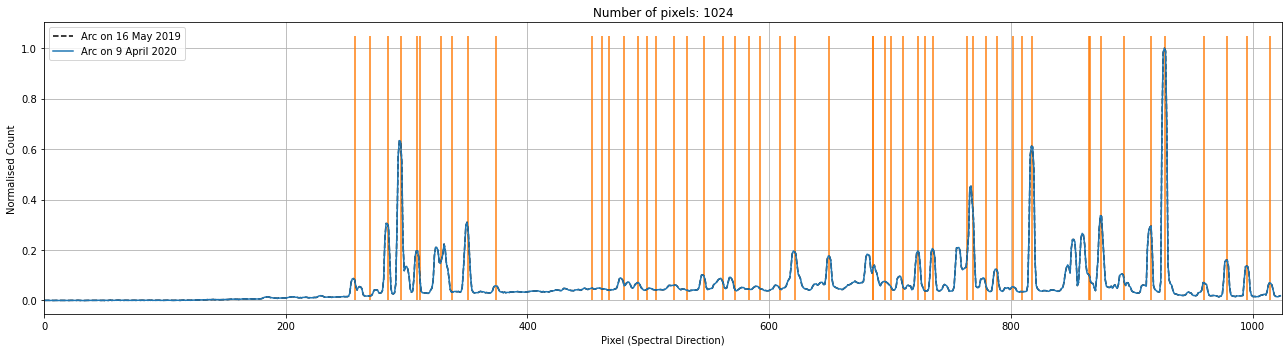

In [20]:
data2 = fits.open('data_lt_sprat/v_a_20200409_39_1_0_1.fits')[0].data
spectrum2 = np.median(data2[105:110], axis=0)

peaks2, _ = find_peaks(spectrum2, height=600, distance=5, threshold=None)
peaks2 = refine_peaks(spectrum2, peaks2, window_width=5)

plt.figure(figsize=(18,5))
plt.plot(spectrum2 / spectrum2.max(), ls="--", color='black', label='Arc on 16 May 2019')

peaks2 = refine_peaks(spectrum2, peaks2, window_width=10)

plt.plot(spectrum2 / spectrum2.max(), label='Arc on 9 April 2020')
plt.vlines(peaks2, 0, 1.05, colors='C1')
plt.title('Number of pixels: ' + str(spectrum2.shape[0]))
plt.xlabel("Pixel (Spectral Direction)")
plt.ylabel("Normalised Count")
plt.xlim(0, 1024)
plt.legend()
plt.grid()
plt.tight_layout()

## Fit using the polynomial fit coefficients as the first best guess

INFO:rascal.calibrator:Peak at: 4502.9564261335945 A
INFO:rascal.calibrator:- matched to 4500.98 A
INFO:rascal.calibrator:Peak at: 4556.104629284713 A
INFO:rascal.calibrator:Peak at: 4623.412447439029 A
INFO:rascal.calibrator:- matched to 4624.28 A
INFO:rascal.calibrator:Peak at: 4670.953608149664 A
INFO:rascal.calibrator:- matched to 4671.23 A
INFO:rascal.calibrator:Peak at: 4732.423388872981 A
INFO:rascal.calibrator:- matched to 4734.15 A
INFO:rascal.calibrator:Peak at: 4741.4622728704135 A
INFO:rascal.calibrator:- matched to 4734.15 A
INFO:rascal.calibrator:Peak at: 4821.98461993674 A
INFO:rascal.calibrator:Peak at: 4860.389981888346 A
INFO:rascal.calibrator:Peak at: 4921.520306416725 A
INFO:rascal.calibrator:- matched to 4921.48 A
INFO:rascal.calibrator:Peak at: 5027.990443435838 A
INFO:rascal.calibrator:- matched to 5028.28 A
INFO:rascal.calibrator:Peak at: 5394.019174645542 A
INFO:rascal.calibrator:Peak at: 5432.044401505524 A
INFO:rascal.calibrator:Peak at: 5459.848024265415 A
I

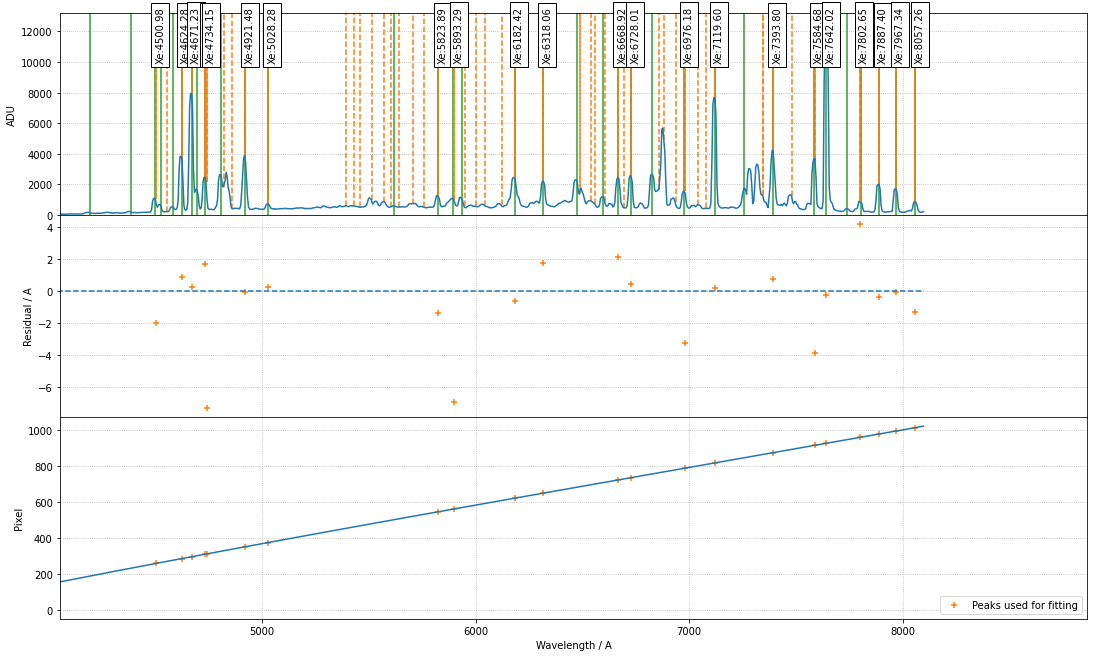

Stdev error: 1.3236239905085923 A
Peaks utilisation rate: 120.58823529411764%


In [21]:
c2 = Calibrator(peaks2,
                num_pix=len(spectrum2),
                min_wavelength=3500.,
                max_wavelength=8000.)
c2.set_fit_constraints(num_slopes=5000,
                       range_tolerance=500.,
                       xbins=100,
                       ybins=100)
c2.load_user_atlas(elements=element, wavelengths=atlas, constrain_poly=True)

polyfit_coeff2, rms2, residual2, peak_utilisation2 = c2.fit(sample_size=5,
                                                top_n=5,
                                                max_tries=500,
                                                candidate_weighted=True,
                                                polyfit_coeff=polyfit_coeff,
                                                hough_weight=1.0,
                                                filter_close=True)

c2.plot_fit(spectrum2,
           polyfit_coeff2,
           plot_atlas=True,
           log_spectrum=False,
           tolerance=10.,
           renderer='notebook')

rms2 = np.sqrt(np.sum(residual2**2 / len(residual2)))

print("Stdev error: {} A".format(np.abs(residual2).std()))
print("Peaks utilisation rate: {}%".format(peak_utilisation2*100))

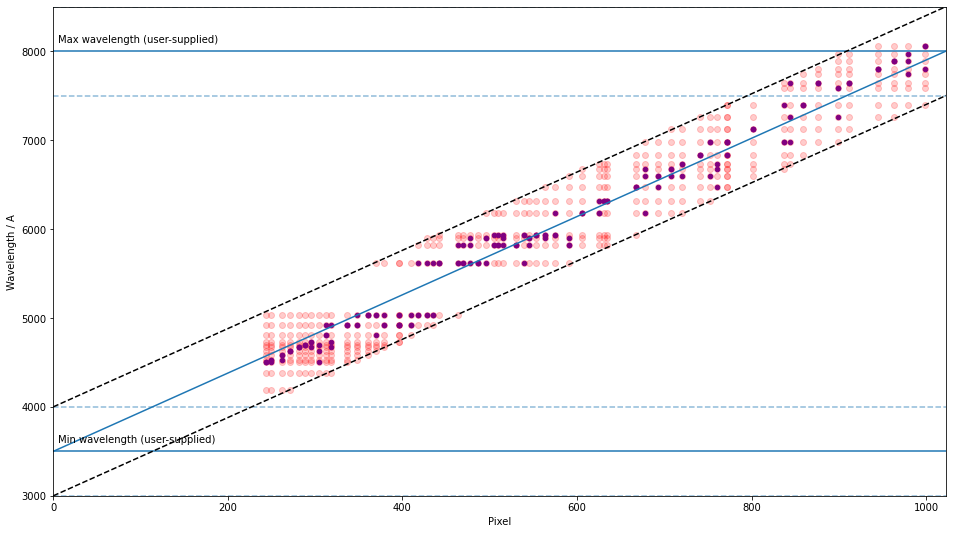

In [22]:
c.plot_search_space()